# Fake News Prediction - ML

#### About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake


1: Fake News

0: Real News

In [1]:
#Section 1
#Importing the Dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
#Section 2 : Data Loading and Overview

import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\ACER\Desktop\Excel Files\Fake_Dataset.csv')

# Display the first few rows and column information
print(df.head())
print(df.info())
print(df['label'].value_counts())  # Check the distribution of the target variable

   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

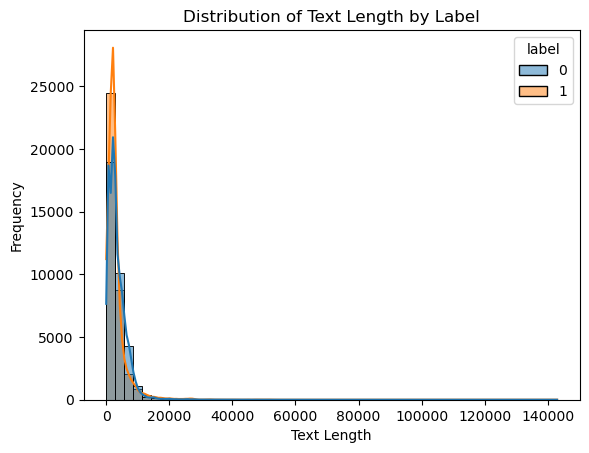

In [12]:
#Section 3: EDA(Exploratory Data Analysis)

# Add a text length column
df['text_length'] = df['text'].fillna('').str.len()

# Plot the distribution of text lengths
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True)
plt.title('Distribution of Text Length by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [14]:
! pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/299.9 kB 660.6 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/299.9 kB 281.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 476.3 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 476.3 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/299.9 kB 450.6 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/299.9 kB 621.6 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/299.9 kB 655.6 kB/s eta 0:00:01
   -------------------------------------  297.0/299.9 kB 706.2 kB/s eta 0:00:

In [ ]:
from wordcloud import WordCloud

# Combine text for each label
fake_text = ' '.join(df[df['label'] == 1]['text'].dropna())
real_text = ' '.join(df[df['label'] == 0]['text'].dropna())

# Generate word clouds
fake_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(fake_text)
real_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(real_text)

# Plot
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Real News Word Cloud')
plt.axis('off')

plt.show()

#### Data Pre-processing

In [17]:
# counting the number of missing values in the dataset
df.isnull().sum()

Unnamed: 0       0
title          558
text            39
label            0
text_length      0
dtype: int64

In [18]:
# replacing the null values with empty string
df = df.fillna('')

In [19]:
# separating the data & label
X = df.drop(columns='label', axis=1)
Y = df['label']

In [20]:
print(X)
print(Y)


       Unnamed: 0                                              title  \
0               0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1               1                                                      
2               2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3               3  Bobby Jindal, raised Hindu, uses story of Chri...   
4               4  SATAN 2: Russia unvelis an image of its terrif...   
...           ...                                                ...   
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  text_length  
0      No comment is expected from Barack Obama Membe...       